# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
# nltk.download('omw-1.4')

# Importing fine with 'utf-16-le'

(Opened in in VS Code to identify it accurately)

In [2]:
# Read in the data using UTF-16 LF encoding
with open('MLK_speech_PA1.txt', 'r', encoding='utf-16-le') as file:
    text = file.read()
    
text

'\ufeffI am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.\n\nFive score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity.\n\nBut one hundred years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languishing in the corners of American society and finds himself an exile in his own land. So we have come here today to dramatize a shameful condition.

# Pre-Processing

In [3]:
tokens = nltk.word_tokenize(text)

# remove all tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# make lowercase
tokens = [word.lower() for word in tokens]

# remove all tokens that are only one character
tokens = [word for word in tokens if len(word) > 1]

# remove stopwords
stop_words = stopwords.words('english')
tokens = [word for word in tokens if word not in stop_words]

# lemmatize words
# nltk.download('wordnet') # uncomment if you need to download the wordnet package
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

# print the first 10 words
print(tokens[:10])

['happy', 'join', 'today', 'go', 'history', 'greatest', 'demonstration', 'freedom', 'history', 'nation']


# Sentiment Analysis

In [4]:
analyzer = SentimentIntensityAnalyzer()

print(analyzer.polarity_scores(text))

{'neg': 0.098, 'neu': 0.704, 'pos': 0.198, 'compound': 0.9997}


In [5]:
for w in tokens[:5]:
    print(w, analyzer.polarity_scores(w))

happy {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
join {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}
today {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


# Changing the metrics for the Sentiment Analysis

In [6]:
negative_words = 0
positive_words = 0

for w in tokens:
    polarity = analyzer.polarity_scores(w)
    if polarity["compound"] < -0.2:
        negative_words += 1 
    if polarity["compound"] > 0.2:
        positive_words += 1

total_words = len(tokens)
neutral_words = total_words - positive_words - negative_words

print(f"Neutral words: {neutral_words} / {neutral_words/total_words*100:0.2f}%")
print(f"Positive words: {positive_words} / {positive_words/total_words*100:0.2f}%")
print(f"Negative words: {negative_words} / {negative_words/total_words*100:0.2f}%")

Neutral words: 656 / 80.29%
Positive words: 124 / 15.18%
Negative words: 37 / 4.53%


#### '5' Additional Points are now considered Neutral.

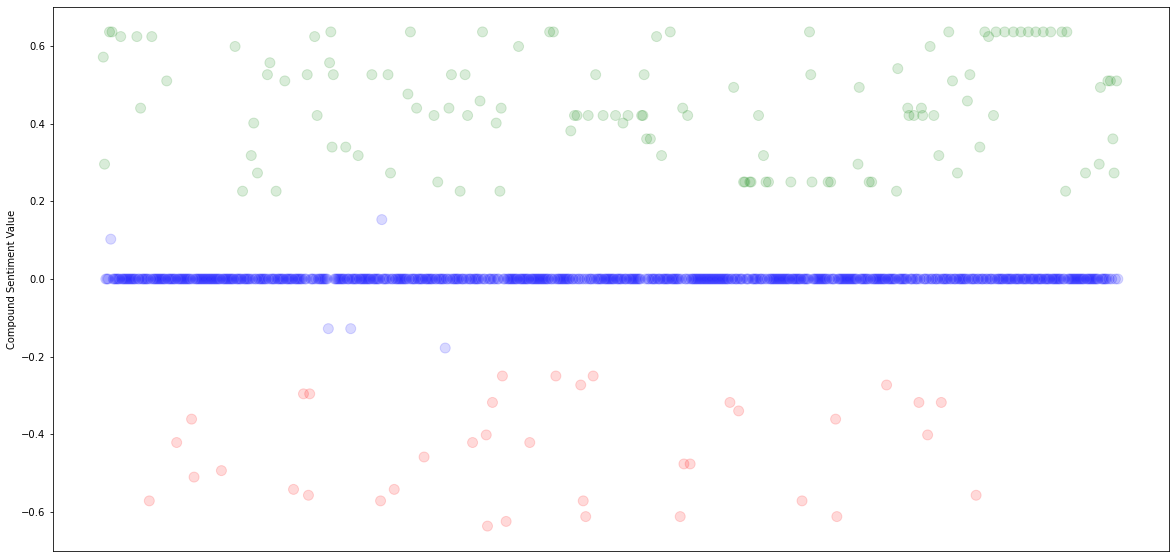

Sentiment Analysis Summary:
Negative words: 37
Neutral words: 656
Positive words: 124


In [7]:
# Color-coded scatter plot
x_values = range(len(tokens))
y_values = [analyzer.polarity_scores(w)["compound"] for w in tokens]
colors = ['red' if y < -0.2 else 'green' if y > 0.2 else 'blue' for y in y_values]


fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values, y_values, c=colors, marker='o',s=100,alpha=0.15)
ax.set_ylabel('Compound Sentiment Value')
ax.xaxis.set_tick_params(bottom=False, labelbottom=False)

plt.show()


negative_count = sum(1 for y in y_values if y < -0.2)
positive_count = sum(1 for y in y_values if y > 0.2)
neutral_count = len(y_values) - negative_count - positive_count

print("Sentiment Analysis Summary:")
print(f"Negative words: {negative_count}")
print(f"Neutral words: {neutral_count}")
print(f"Positive words: {positive_count}")

(20, 15, 13, 13, 12, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6)
('freedom', 'negro', 'one', 'let', 'ring', 'nation', 'dream', 'day', 'every', 'come', 'today', 'go', 'back', 'satisfied', 'must', 'justice', 'able', 'white', 'together', 'men')


Text(0.5, 1.0, 'Barplot of Top 20 Most Frequent Words')

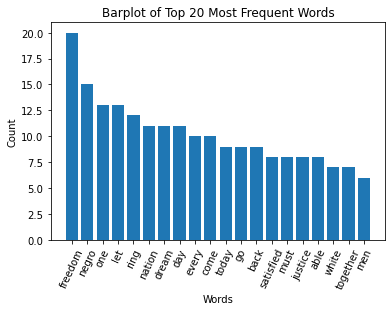

In [8]:

token_freq = {}
for token in tokens:
    token_freq[token] = token_freq.get(token, 0) + 1
    
    
    
word_freq = []
for key, value in token_freq.items():
    word_freq.append((value, key))

word_freq.sort(reverse=True)

top20_words = word_freq[0:20]

# Convert the list of tuples to two tuples for plotting using zip()
values, labels = zip(*top20_words) # unzip the list of tuples into two tuples
print(values)
print(labels)

# Barplot of most frequent words
plt.bar(labels, values)
plt.xlabel('Words')
plt.xticks(rotation=65)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Most Frequent Words')

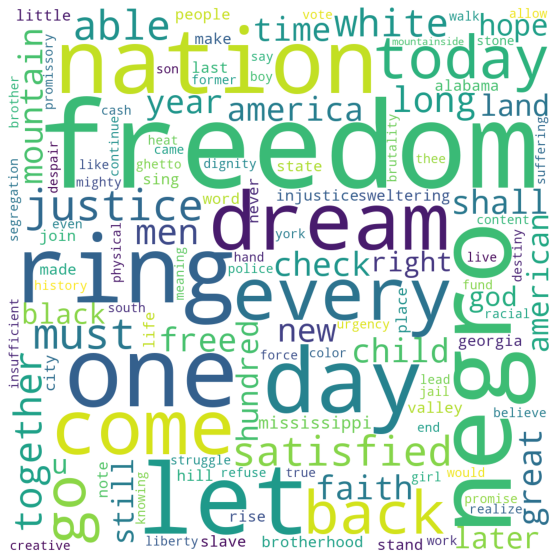

In [20]:
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    min_font_size=16,
)

wordcloud.generate_from_frequencies(token_freq)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Color-coded the words in the words according to Word Cloud


(Mostly used AI Aid for this. Initially used recolor() function for word cloud, but AI gave a better solution.)

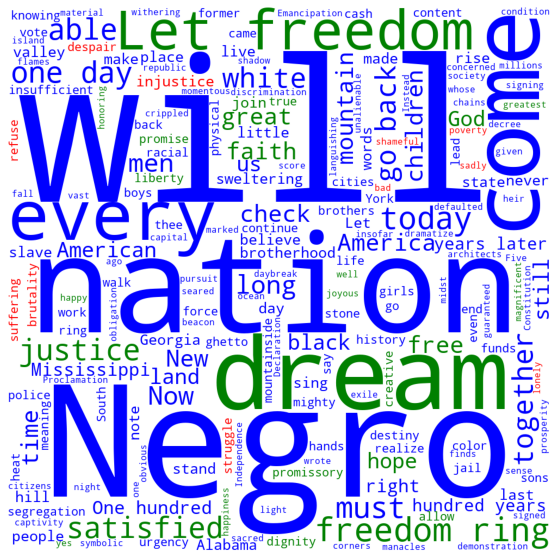

In [21]:
def color_func(word, **kwargs):
    try:
        score = analyzer.polarity_scores(word)["compound"]
        if score > 0.2:
            return "green"
        elif score < -0.2:
            return "red"
        else:
            return "blue"
    except:
        return "blue"

wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white',
    color_func=color_func,
    min_font_size=16,
)

wordcloud.generate(text)  # use 'text' instead of 'token_freq'

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()